## Model Development

**Objectives:**

Lean how to develop prediction models

**Task:** 

Develop several models that will predict the price of the car using the variables or features. This is just an estimate but it should provide us an objective idea of how much the car should cost.

Questions that we want to cover within this activity: 

How do I know whether the dealer is offering fair value for my trade-in?
How do I know whether I put a fair value on my car?

From **Data Analytics** perspective **Model Development** can help us: 

- to predict future observations from the data we have.

- to understand how variables are used to predict the result as well as the relationship between them.

**Setup**

In [1]:
# install the libraries using 'piplite' to run this lab on your browser
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['scikit-learn'])
await piplite.install(['skillsnetwork', 'seaborn'])

In [2]:
# for Anaconda use below code
# install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy==1.21.2-y
#! mamba install sklearn=0.21.1-y

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [4]:
# downloading the dataset into your browser

from pyodide.http import pyfetch

async def download(url, filename):
    responce = await pyfetch(url)
    if responce.status == 200:
        with open(filename, "wb") as f:
            f.write(await responce.bytes())

In [5]:
# Download the dataset hosted on IBM Cloud object

await download('https://cf-courses-data.s3.us.cloud-object-storage.\
appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/\
labs/Data%20files/\automobileEDA.csv','automobileEDA.csv')

In [6]:
#to download the dataset for local machine, please uncomment the following 
#await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')

In [7]:
#load the data and store the data in dataframe 'df'
df = pd.read_csv("automobileEDA.csv", header=0)

In [8]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 1. Linear Regression and Multiple Linear Regression 

<b> Simple Linear Regression</b>

<p> Using this method we can understand the relationship between two variables:</p>
<ul>
    <li>The predictor(independent variable) - X</li>
    <li>The responce(dependent variable) - Y</li>
</ul>

<p> The result of such Linear Regression is a `linear function` that can predict the response of (dependent) variable as a function of the predictor (independent) variable.</p>

$$ 
Y: Responce \ Variable \\\\\\\\\\
X: Predictor \ Variables
$$


<b> Linear Function </b>
$$
Yhat = a + b X
$$


<li>a refers to the <b>incercept</b> of the regression line, in other world: the value of Y when X is 0</li>
<li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit.</li>

In [9]:
# load modules for linear regression
from sklearn.linear_model import LinearRegression

In [10]:
# create regression object

lm = LinearRegression()
lm

LinearRegression()

In [11]:
#using linear regression create a linear function with a "highway-mpg"
# as the predictor variable and the "price" as the responce variable. 

In [12]:
X = df[['highway-mpg']]
Y = df['price']

In [13]:
# fit linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [14]:
#output prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [15]:
#value of the intercept(a)
lm.intercept_

38423.30585815743

In [ ]:
#value of the slope(b)? 
lm.coef_

<h3> Final estimated linear model</h3>

We will get a final linear model with the structure: 
    
$$
Yhat = a + b X
$$


With actual values it will go up to: 
    
Price = 38423.31 - 821.73 x <b>highway-mpg</b>

In [19]:
# create a linear regression object calles "lm1".
Lm1=LinearRegression()
Lm1

LinearRegression()

In [20]:
# train the model using "engine-size" as independent var, 
# and the "price" as the dependent variable

X = df[['engine-size']]
Y = df['price']

In [23]:
Lm1.fit(X,Y)

LinearRegression()

In [26]:
#different way
#Lm1.fit(df[['engine-size']], df['price'])
#Lm1

In [29]:
# find the slope
lm.coef_

array([166.86001569])

In [28]:
# find the intercept
lm.intercept_

-7963.33890628106

In [30]:
#Equation of the predicted line = ?
# use x and yhat or "engine-size" or "price". 

In [33]:
Yhat= -7963.34 + 166.86*X
Price = -7963.34 + 166.86*df['engine-size']

<H3>Multuple Linear Regression</H3>

This method is used to explain the relationship between a continuous responce(dependent) and 2 of more predictor(independent) variables. 
Structure illustration: 


$$
Y: Responce \ Variable\\\\\\\\\\
x\_1: Predictor \ Variable \ 1\\\\
x\_2: Predictor \ Variable \ 2\\\\
x\_3: Predictor \ Variable \ 3\\\\
x\_4: Predictor \ Variable \ 4\\\\
$$




$$
a: intercept \\\\\\\\\\
b\_1: coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$



The equation is given by: 

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$



In [37]:
# develpp a model using some variavles as the predictor variables

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [38]:
#fit linear model in above variables

lm.fit(Z, df['price'])

LinearRegression()

In [39]:
#intercept
lm.intercept_

-15806.62462632918

In [40]:
#value of each coefficient

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
# applying results to the linear function: 

Price = -15678.742628061467 + 52.65851272 x horsepower\
+ 4.69878948 x curb-weight + 81.95906216 x engine-size\
+ 33.58258185 x highway-mpg

In [47]:
#create & train a Multiple Linear Regression model "lm2" where the responce var. 
#is "price", and the predictor var. is "normalized-losses" & "highway-mpg"
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [50]:
#coefficient of a model

lm2.coef_

array([   1.49789586, -820.45434016])

<h3>2. Model Evaluation Using Visualization</h3>

How do we evaluate models and choose which one is the best? 
We can use visualization for model evaluation. 

In [53]:
# import the visualization package: seaborn

import seaborn as sns
%matplotlib inline

<H4>Regression Plot</h4>

<p><b>Regression plots</b> is an excellent way to visualize the fit if the model when it comes to simple linear regression</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0.0, 48167.3740655744)

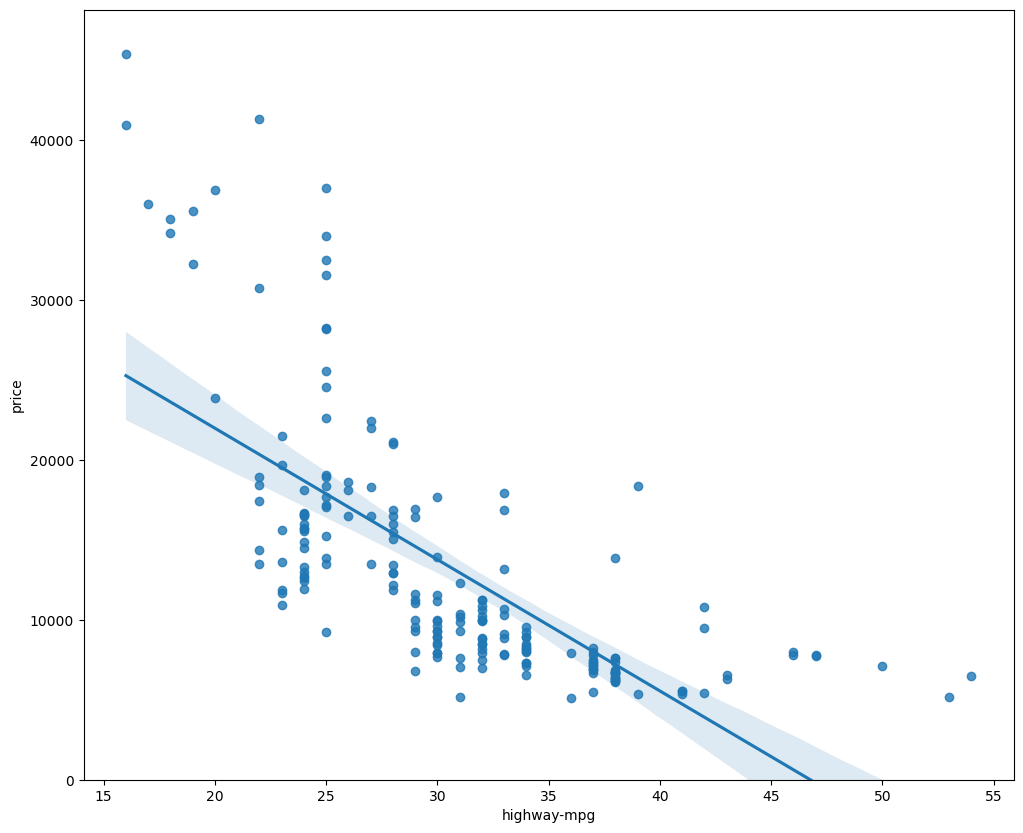

In [56]:
#visualize 'highway-mpg' as potential predictor variable of price: 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>The price is negatively correlated to `highway-mpg` since the regression slope is negative.</p> 

<p>It is important to check how scattered the data points are around the regression line in the regression plot. 
This will give good indication of the varianlce of the data, it will also show whether a linear model is the best fit. 
When the dazta is too far from the liye this linear model might not be the best model for this data.</p>

(0.0, 47414.1)

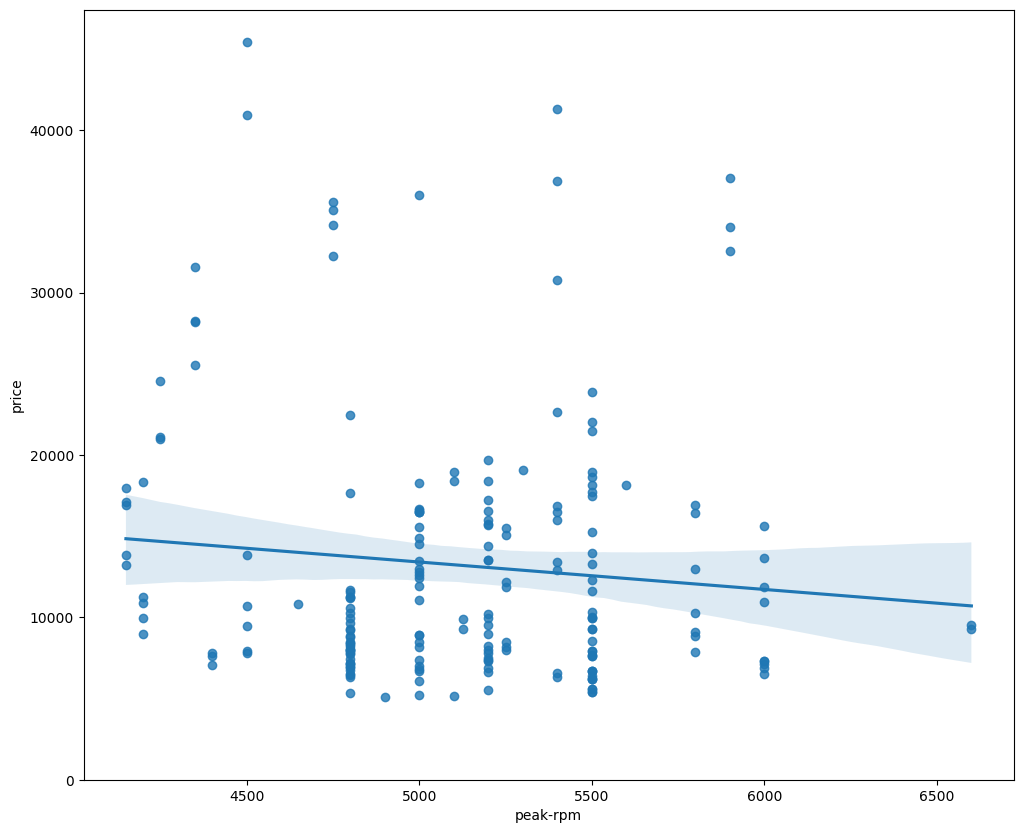

In [62]:
#compare this plot to the regression plot of 'peak-rpm'
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Regression plots of "peak-rpm" vs "highway-mpg" comparation:

    -The points for "highway-mpg" are much closer to the generated line and, on average, decrease. 
    -The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasubf if ubcreasing as the "peak-rpm" increases. 

In [67]:
#Check if "peak-rpm" or "highway-mpg" is strongly correlated with "price"

df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<H4>Residual plot</h4>

<p>Variances of the data can be shown through the residual plot.</p> 

<p><b>Residual</b> is the difference between y(the observed value) and Yhat(the predicted value). 
In a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p><b>Residual Plot</b> is a graph that shows the residuals on the vertical y-axis and the independent variable on the horisontal x-axis.</p> 
    
<p>When looking at the resudual plot we need to look at the spread of the residuals.</p>

<p>If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.</p> 

<p>Randomly spread out residuals mean that the variance is constant and this also means that model is a good fit for this data.</p>

    

<function matplotlib.pyplot.show(close=None, block=None)>

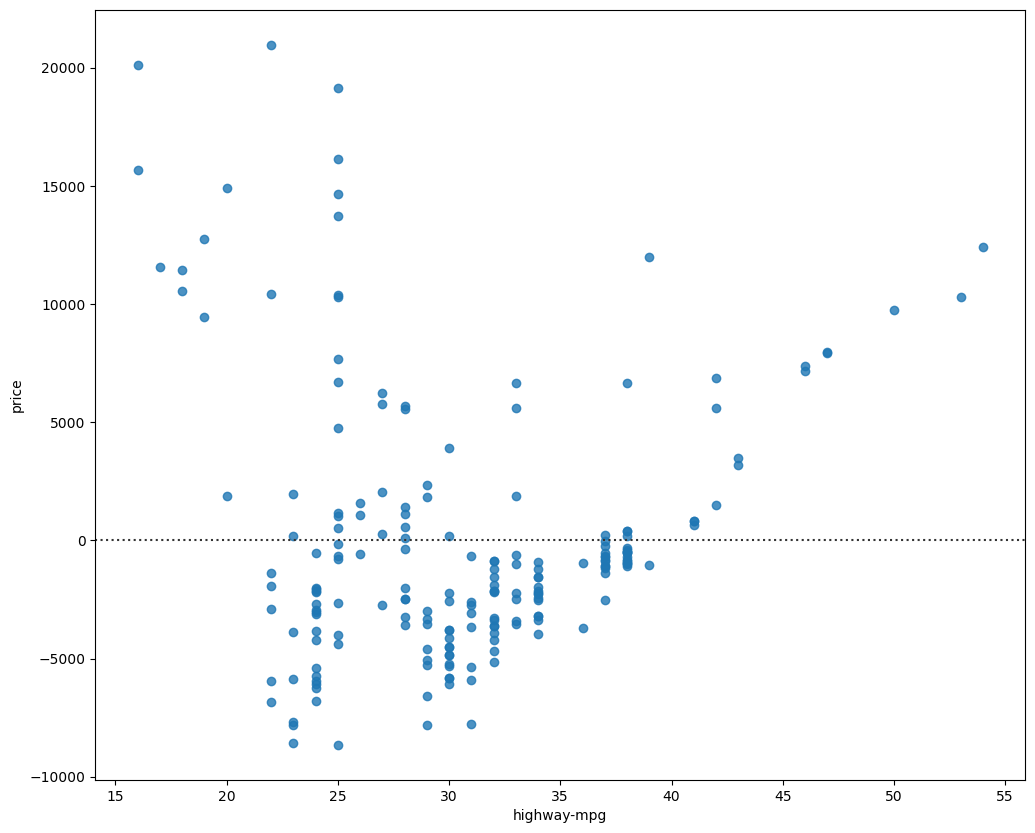

In [70]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show

This residual plot shows us that the residuals are not randomly spread around the axis. A non-linear model could be more appropriate for this data. 

<h4>Multiple Linear Regression</h4>

Multiple linear regression comes into place when you cannot visualize a model with regression or residual plot. 

One of the options could be to use the <b>distrubution plot</b>

<p>We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actial values</p>


In [74]:
#make a prediction
Y_hat = lm.predict(Z)

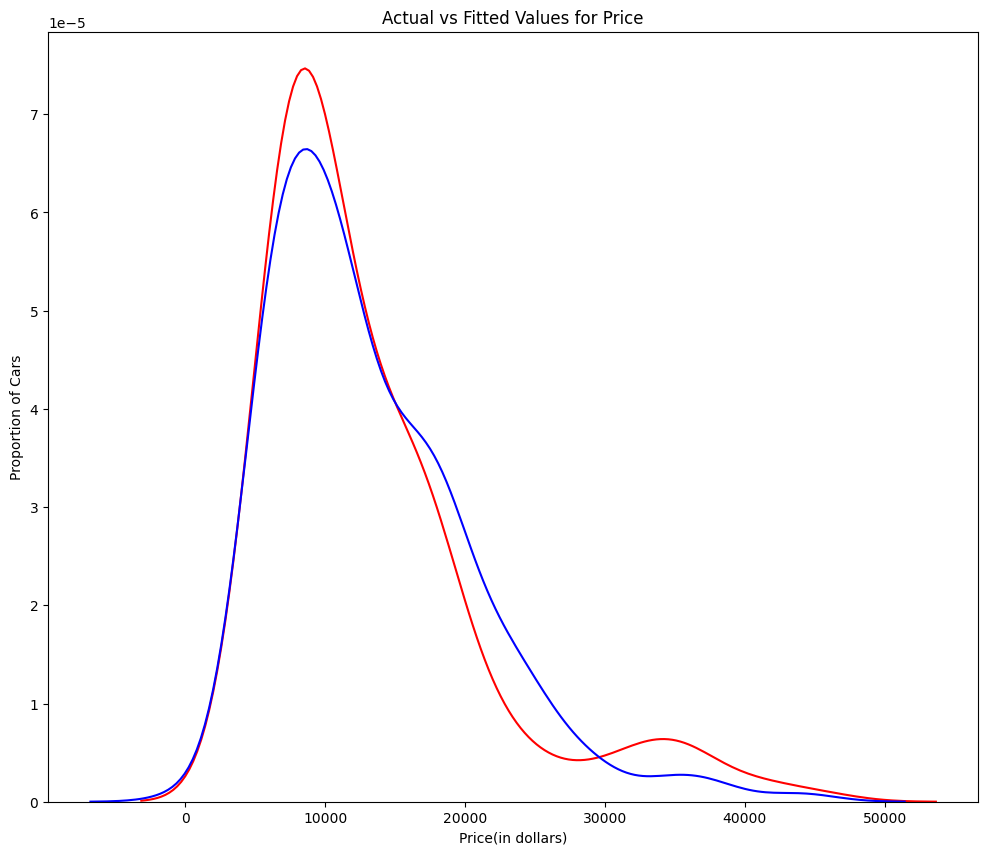

In [77]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price(in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
The fitted values are reasonably close to the actual values since the two distributions overlap a bit. 
This also signifies that there is some room for improvement. 

<h3>3. Ploynomial Regression and Pipelines</h3>

<b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models. 
Non-linear regressions can be gotten by squaring or setting higher-order terms of the predictor variables. 

Orders of polynomial regression: 
    
<center><b>Quadratic - 2nd Order</b></center>

$$
Yhat = a + b_1X + b_2X^2
$$
<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X + b_2 X^2 + b_3 X^3\\\\\\
$$
<center><b>Higher_order</b></center>
$$
Y = a + b_1 + b_2 X^2 + b_3 x^3 ....\\\\
$$
    

From previous examples we learned that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. 

In [83]:
# usse polynomial model to fit the data

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [85]:
# get the variables: 
x = df['highway-mpg']
y = df['price']

Fit polynomial using the function `polyfit()`. 

Display the polynomical function by using 'poly1d()'

In [89]:
# example of the polynomial function of the 3rd order(cubic)

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


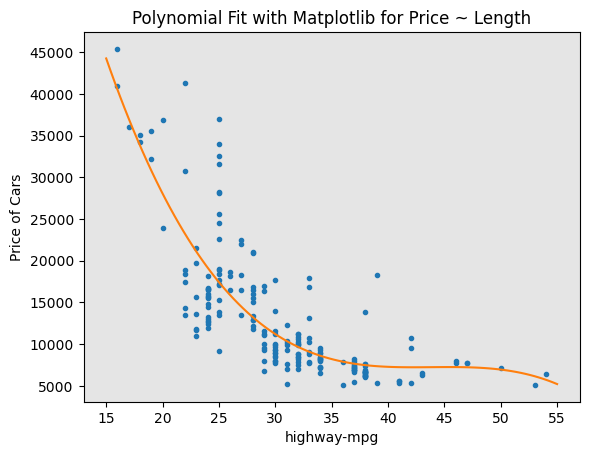

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [90]:
#plot the function
PlotPolly(p,x,y, 'highway-mpg')
np.polyfit(x,y,3)

The generated polynomial function 'hits' more of the data points, therefore this polynomial model performs better than the linear model. 

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


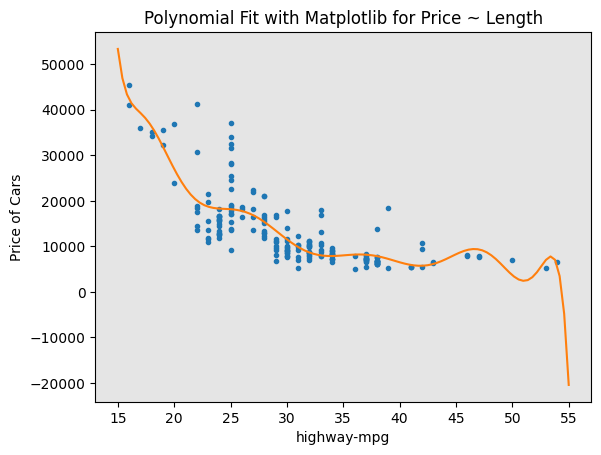

array([-1.24263622e-08,  4.72185774e-06, -8.02844994e-04,  8.05641836e-02,
       -5.29742001e+00,  2.39470796e+02, -7.58847246e+03,  1.68447594e+05,
       -2.56531683e+06,  2.55141164e+07, -1.49107290e+08,  3.87930961e+08])

In [93]:
# create 11 order polynomial model with the variables x and y from above

f11 = np.polyfit(x, y, 11)
p11 = np.poly1d(f11)
print(p11)
PlotPolly(p,x,y, 'highway-mpg')
np.polyfit(x,y,11)

The analytical expression for Multivariate Polynomial function gets more complex. 

Example: the expression for a second order (degree=2) polynomial with 2 variables: 

$$
Yhat = a + b\_1X\_1 + b\_2X\_2 + b\_3X\_1X\_2 + b\_4X\_1^2 + b\_5X\_2^2
$$


<b>Perform a polynomial transformation on multiple variables:<b> 

In [97]:
#import the module
from sklearn.preprocessing import PolynomialFeatures

In [98]:
#create a Polynomial features object of degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [117]:
Z.shape #201 samples and 4 features

(201, 4)

In [118]:
#Z_pr.shape 
# after transformation there are 201 samples & 15 features 

<H3>Pipeline</H3>

Data pipelines simplify the steps of processing the data. 
We use <b>StandardScaler</b> as a step in our pipeline

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [120]:
#create pipeline by creating list of tuples
#includ the name of the model or estimator 
# include the name of its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),\
       ('model',LinearRegression())]

In [121]:
#input the list as an argument to the pipeline constructor
pipe=Pipeline(input)
pipe

Pipeline(steps=<function Interpreter.input.<locals>.<lambda> at 0x88f4c80>)

In [ ]:
#1. convert the data type Z to type float
#StandardScaler may issue warning in inpot is not a float

Z = Z.astype(float)

#2. normalize yhe data
#Perform transform and fit the model simultaneously

pipe.fit(Z,y)

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [ ]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(input)
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

<h3>Measures for In-Sample Evaluation</h3>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h4>Model 1: Simple Linear Regression</h4>

Calculate R^2:

In [131]:
#highway_mpg_fit
lm.fit(X, Y)
#find the R^2
print('The R-square is:',lm.score(X,Y))

The R-square is: 0.7609686443622008


~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".  

Calculate the MSE:

Predict the output "yhat" using the predict method, where X is the input variable

In [134]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is:', Yhat[0:4])

The output of the first four predicted value is: [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


Import the function `mean_squared_error` from the module `metrics`

In [135]:
from sklearn.metrics import mean_squared_error

Compare the predicted results with the actual results

In [137]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


<H4>Model 2: Multiple Linear Regression</H4>

calculate R^2

In [143]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577458


~80,896% of variation of price is explained by this multiple linear regression `multi-fit`.

Calculate the MSE

In [145]:
# introduce predition
Y_predict_multifit = lm.predict(Z)

Compare predicted results to actual results:

In [146]:
print('The mean square error of price and predicted value using multifit is:', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is: 11980366.870726489


<H4>Model 3: Polynomial Fit</H4>

Calculate R^2

In [147]:
#import r2_score from the module `metrics`
#since we are using different function
from sklearn.metrics import r2_score

Apply the function to get the value of R^2

In [148]:
r_squared = r2_score(y, p(x))
print('The R-square value is:', r_squared)

The R-square value is: 0.702376909243598


~67,419% of the variation of price is explained by this polynomial fit. 

Calculate the MSE

In [150]:
mean_squared_error(df['price'], p(x))

18703127.63915394

<H3>5.Prediction and Decision Making</H3>

<H4>Prediction</H4>

Use method `predict` to produce a prediction. 

In [153]:
#import pyplot for plotting
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [154]:
#reate a new input
new_input=np.arange(1,100, 1).reshape(-1,1)

In [156]:
#fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [157]:
#produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

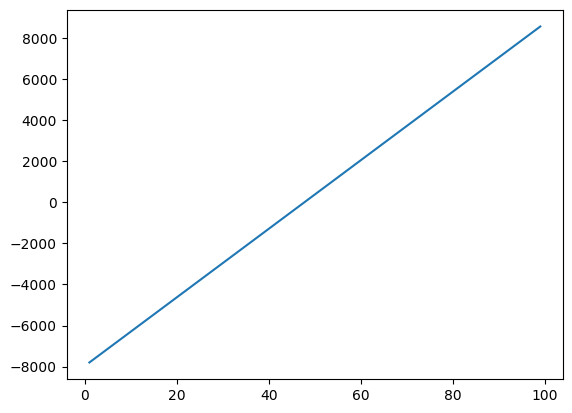

In [158]:
#plot the data
plt.plot(new_input, yhat)
plt.show()

<H4>Decision Making: Determining a Good Model Fit</H4>

- The model with the higher R-squared value is a better fit for the data. (Good R-squared value)
- The model with the smallest MSE value is a better fit for the data (Good MSE value)

<H5><b>Comparing the Values for the different models:</b></H5>

<p><b>Simple Linear Regression:</b> Using Highway-mpg as a Predictor Variable of Price.</p>
    <ul>
        <li>R-squared:0.49659118843391759
        <li>MSE:3.16 x 10^7
    </ul>
<p><b>Multiple Linear Regression:</b>Using Horsepower, Curb-weight, Engine-size and Highway-mpg as Predictor Variables of Price. </p>
    <ul>
        <li>R-squared:0.80896354913783497
        <li>MSE:1.2 X 10^7
    </ul>
<p><b>Polynomial Fit:</b> Using Highway-mpg as a Predictor Variable of Price</p>
    <ul>
        <li>R-squared:0.674196663906514
        <li>MSE:2.07 X 10 ^ 7
    </ul>

<H4>Simple Linear regression Model(SLR) vs Multiple Linear Regression Model(MLR)</H4>

<p>In order to compare the results of the MLR vs SLR models, we need to look at a combination of both: R-squared and MSE to make the best conclusion about the fit of the model. </p>
    <ul>
        <li><b>MSE:</b> The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2x10^7.
        The MSE of MLR is much smaller. 
        <li><b>R-squared:</b> There is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR(~0.497) is very small compared to the R-squared for the MLR(~0.809)
    </ul>
<p>The R-squared in combination with the MSE show that MLR seems like the better model fit i this case compared to SLR.     

<H4>Simple Linear Model(SLR) vs Polynomial Fit</H4>

<ul>
        <li><b>MSE:</b> Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR. 
        <li><b>R-squared:</b>The R-Squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quire a bit
</ul>
   
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting `price` with `highway-mpg` as a predictor variable</p>

<H4>Multiple Linear Regression(MLR) vs. Polynomial Fit</h4>

<ul>
    <li><b>MSE:</b> The MSE for the MLR is smaller than the MSE for the Polynomial Fit
    <li><b>R-squared:</b> The R-squared for the MLR is also much larger than the Polynomial Fit.
</ul>    

<H2>Conclusion:</H2>

Comparing these three models, we can conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. 
This result makes sence since we had 27 variables in total and we knew that more than one of those variables are potential predictors of the final car price. 